# MA332 Homework 4
Ben Raivel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Divided differences and nested polynomial functions from class:

In [2]:
def newtons_divided_diff(x, y):  
    
    n = len(x)
    
    div_diff = np.zeros((n, n))
    div_diff[:,0] = np.transpose(y)
    
    for col in range(1, n):
        
        for row in range(0, n-col):
            
            div_diff[row, col] = (
                (div_diff[row+1, col-1] - div_diff[row, col-1])
                /(x[row+col] - x[row]))
    
    return div_diff[0,:]

In [3]:
def nested_poly(deg, div_diff_coeff, x_samples, interp_pts):
    
    y = div_diff_coeff[deg]
    
    for k in range(deg, 0, -1):
        
        y = y*(x_samples - interp_pts[k-1]) + div_diff_coeff[k-1]
 
    return y    

## 1.

$$ f(x) = \frac{1}{x^2 + 5} \qquad -10 \le x \le 10$$

Define $f(x)$

In [21]:
def f(x): return 1/(x**2 + 5)

### (a)
Interpolate with evenly spaced points

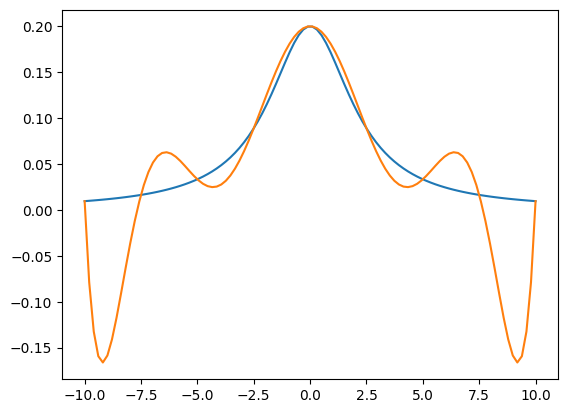

In [22]:
even_inter_pts = np.linspace(-10, 10, 9)

div_diff = newtons_divided_diff(even_inter_pts, f(even_inter_pts))

x = np.linspace(-10, 10, 100)
y = f(x)

even_space_y = nested_poly(8, div_diff, x, even_inter_pts)

plt.plot(x, y)
plt.plot(x, even_space_y)
plt.show()

### (b)
First, define a function to return $n$ Chebyshev nodes on $[a,b]$

In [23]:
def chebyshev_nodes(a, b, n):
    
    k = np.arange(1, n+1)
    
    x_k = np.cos(np.pi*(2*k - 1)/(2*n))

    return 0.5*(b - a)*x_k + 0.5*(b + a)

Interpolate using Chebyshev nodes

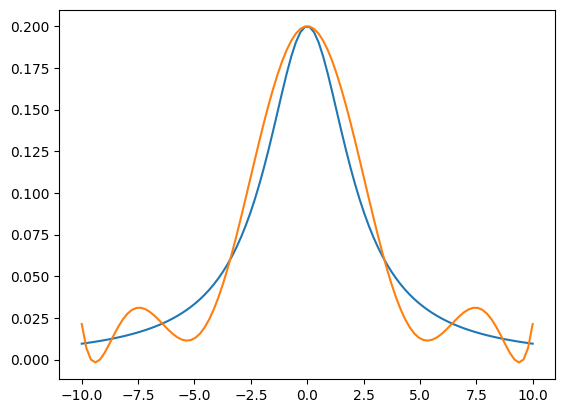

In [24]:
cheb_inter_pts = chebyshev_nodes(-10, 10, 9)

div_diff = newtons_divided_diff(cheb_inter_pts, f(cheb_inter_pts))

chebyshev_y = nested_poly(8, div_diff, x, cheb_inter_pts)

plt.plot(x, y)
plt.plot(x, chebyshev_y)
plt.show()

### (c)
Compute and display error of both interpolations

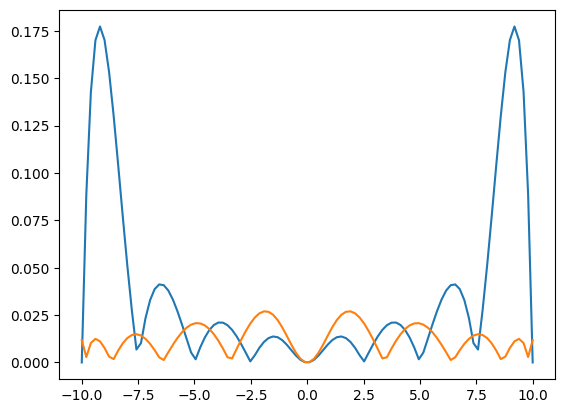

In [26]:
even_error = np.abs(y - even_space_y)
cheb_error = np.abs(y - chebyshev_y)
plt.plot(x, even_error)
plt.plot(x, cheb_error)
plt.show()

## 2.
Create an array with oil consumption data:

In [12]:
annual_us_oil = np.array(
    [[2010, 23.65],
     [2011, 23.42],
     [2012, 23.03],
     [2013, 23.48],
     [2014, 23.54],
     [2015, 23.99],
     [2016, 24.22],
     [2017, 24.44],
     [2018, 24.92],
     [2019, 25.03],
     [2020, 21.99],
     [2021, 23.83],
     [2022, 24.46]])

Plot the data and two interpolations

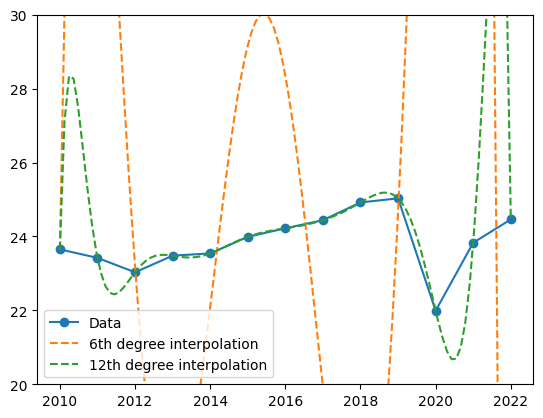

In [5]:
div_diff = newtons_divided_diff(annual_us_oil[:,0], annual_us_oil[:,1])

y_6 = nested_poly(6, div_diff, np.linspace(2010, 2022, 100), annual_us_oil[::2,0])
y_12 = nested_poly(12, div_diff, np.linspace(2010, 2022, 100), annual_us_oil[:,0])

plt.plot(annual_us_oil[:,0], annual_us_oil[:,1], marker='o', label='Data')
plt.plot(np.linspace(2010, 2022, 100), y_6, linestyle='dashed', label='6th degree interpolation')
plt.plot(np.linspace(2010, 2022, 100), y_12, linestyle='dashed', label='12th degree interpolation')
plt.ylim((20, 30))
plt.legend()
plt.show()

The 6th degree interpolation is not useful at all. The 12th degree interpolation is pretty good from 2012 to 2020

## 3.
Define a function to return the three point centered difference for given function and parameter $h$ as a function of x

In [6]:
def three_pt_centered(f, h):

    def df(x):
        return (f(x+h) - f(x-h))/(2*h)

    return df

In [7]:
def f(x): return np.exp(x)

Plot the error for different $h$ values

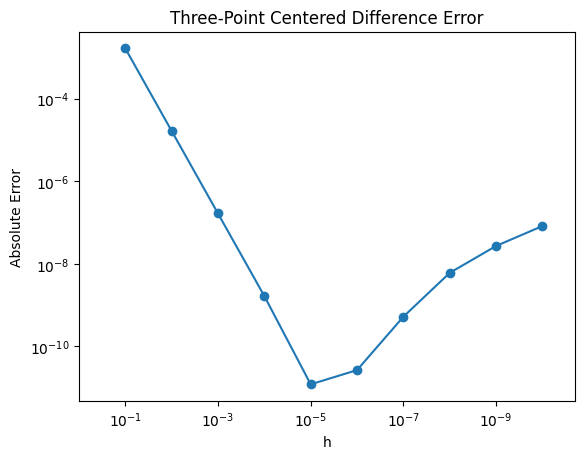

In [8]:
results = []

for i in range(10):
    
    h = 10**(-(i+1))

    df = three_pt_centered(f, h)

    results.append([h, df(0)])

results = np.array(results)
error = np.abs(results[:,1] - 1)

plt.plot(results[:,0], error, marker='o')

plt.semilogx()  # log scale x
plt.semilogy()  # log scale y

plt.xlim(1e0, 2e-11)  # flip x-axis

plt.title('Three-Point Centered Difference Error')
plt.xlabel('h')
plt.ylabel('Absolute Error')

plt.show()

## 4.

### (a)
$$ f(x + h) = f(x) + hf^{(1)}(x) + \frac{h^2}{2!}f^{(2)}(x) + \frac{h^3}{3!}f^{(3)}(x) + \frac{h^4}{4!}f^{(4)}(\xi(x)) $$

$$ f(x - h) = f(x) - hf^{(1)}(x) + \frac{h^2}{2!}f^{(2)}(x) - \frac{h^3}{3!}f^{(3)}(x) + \frac{h^4}{4!}f^{(4)}(\xi(x)) $$

### (b)
$$ f(x + h) + f(x - h) = 2f(x) + h^2f^{(2)}(x) + \frac{h^4}{6}f^{(4)}(\xi(x))$$

### (c)
$$ f^{(2)}(x) = \frac{f(x + h) + f(x - h)}{h^2} - \frac{2f(x)}{h^2} - \frac{h^2}{6}f^{(4)}(\xi(x)) $$
This is a second-order, three point approximation.

## 5.

Define the above as a function which returns a function again

In [9]:
def second_derivative(f, h=1e-5):

    def d2f(x):
        return (f(x + h) + f(x - h) - 2*f(x))/h**2

    return d2f

In [10]:
def f(x): return np.sin(x)

Plot $f(x)$ and $\frac{d^2f}{dx^2}$

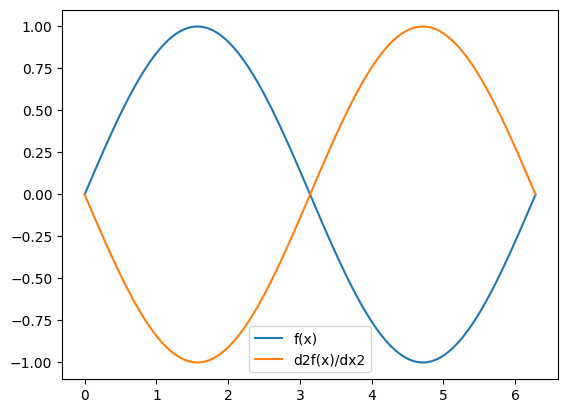

In [11]:
d2f = second_derivative(f)

x = np.linspace(0, 2*np.pi, 100)

y = f(x)

d2y = d2f(x)
plt.plot(x, y, label='f(x)')
plt.plot(x, d2y, label='d2f(x)/dx2')
plt.legend()
plt.show()